# EDA hazifeladat - IMDB filmek

# 1. Adatok és téma bemutatása

## 1.1 Forrás:
[\[kaggle.com\]](https://www.kaggle.com/datasets/willianoliveiragibin/10000-data-about-movies-1915-2023)

## 1.2 Az adatok leirasa
Az adatok IMDb nevű interneten elérhető filmadatbázisból lettek kinyerve CSV
formátumban kutatási és oktatási célokra. Az adathalmaz 10,000 rekordot tartalmaz
különböző 1915 és 2023 között megjelent filmekről. A filmek neve és megjelenésük éve
mellett olyan adatokat is tartalmaz, mint felhasználói és filmkritikusi értékelések,
bevétel, filmhossz, műfaj, besorolás, rendező, rövid leírás, illetve a filmben szereplő
színészek.
10000 rendelkezésünkre álló adatrekord van, amik összesen 12 attribútummal rendelkez(het)nek

**Oszlopok felsorolasa**
1. Film címe
2. Film megjelenésének éve
3. IMDb felhasználó értékelés
4. Kritikusok összesített értékelése
5. Bevétel 
6. Felhasználói értékelések száma
7. Játékidő
8. Műfaj
9. Besorolás
10. Rövid ismertető 
11. A film rendezője
12. Főszereplők 

**Hipotézisek, feltárandó elemzések**
- Egyszerű összefüggések különböző értékek között 
    - Mi kedvenc műfaj?
        - Értékelés-műfaj
    - Mi a legjövedelmezőbb műfaj?
        - Műfaj-bevétel
    - Kik a legnépszerűbb színészek?
    - Metascore és felhasználói értékelések kapcsolata
        - Mennyire korrelálnak ezek az értékek?
        - Mely filmeknél a legmarkánsabb az eltérés?
    - A felhasználói értékelések száma és az étékelések átlaga
        - A népszerűbb filmeknél nagyobb a szórás?
        - Mely filmeknél a legegységesebb?
    - Stb.
- Trendelemzések
    - Hogyan változnak a különböző évtizedekben a filmek tulajdonságai?
        - Játékidő, besorolás, műfaj
    - Hogyan változott a bevétel?
        - Mai dollárárfolyamra átszámolva
- Komplexebb vizsgálat
    - A nemzetközi események hogyan hatnak a háborús filmekre?
        - Tükröződik az aktuális „főellenség”
        - Érezhetően megnövekedik a háborús filmek száma, valamilyen nemzetközi események hatására
        - Milyen a fogadtatásuk? Népszerűek-e egyáltalán? 

# 2 Adatok értelmezése

## 2.1  jellemzők értelmezése

### 2.1.1 Adatok beolvasasa

In [55]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("data.csv")
df.head()

,Unnamed: 0,Movie Name,Year of Release,Run Time in minutes,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
0,0,The Shawshank Redemption,1994,142,9.3,2804443,82.0,28340000.0,['Drama'],R,['Frank Darabont'],"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...","['Over', 'the', 'course', 'of', 'several', 'ye..."
1,1,The Godfather,1972,175,9.2,1954174,100.0,134970000.0,"['Crime', ' Drama']",R,['Francis Ford Coppola'],"['Marlon Brando', 'Al Pacino', 'James Caan', '...","['Don', 'Vito', 'Corleone,', 'head', 'of', 'a'..."
2,2,Ramayana: The Legend of Prince Rama,1993,135,9.2,12995,NaN,NaN,"['Animation', ' Action', ' Adventure']",PG,"['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski']","['Arun Govil', 'Nikhil Kapoor', 'Edie Mirman',...","['An', 'anime', 'adaptation', 'of', 'the', 'Hi..."
3,3,The Chaos Class,1975,87,9.2,42231,NaN,NaN,"['Comedy', ' Drama']",NaN,['Ertem Egilmez'],"['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...","['Lazy,', 'uneducated', 'students', 'share', '..."
4,4,The Dark Knight,2008,152,9.0,2786129,84.0,534860000.0,"['Action', ' Crime', ' Drama']",PG-13,['Christopher Nolan'],"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...","['When', 'the', 'menace', 'known', 'as', 'the'..."


### 2.1.2 jelentés, tartalom

Adatok merete, oszlopok
13. oszlop!

In [56]:
df.shape

(10000, 13)

Oszlopok
Unnamed: 0 !


### 2.1.2 Tipus

In [57]:
# unnamed? minden object string
df.columns

Index(['Unnamed: 0', 'Movie Name', 'Year of Release', 'Run Time in minutes',
       'Movie Rating', 'Votes', 'MetaScore', 'Gross', 'Genre', 'Certification',
       'Director', 'Stars', 'Description'],
      dtype='object')

### 2.1.3 értékkészlet (intervallumok, különböző kategóriák)

az object tombok szet kell robbantani hogy tenyleges egyediseget talaljunk

In [58]:
genre_count = (
    df["Genre"]
    .str.strip("[]")          
    .str.replace("'", "", regex=False) 
    .str.split(", ")       
)

genre_count.explode().nunique()

39

In [59]:
df["Director"].nunique()

4162

In [60]:
director_Count = (
    df["Director"]
    .str.strip("[]")           
    .str.replace("'", "", regex=False) 
    .str.split(", ")           
)

director_Count.explode().nunique()

4351

In [61]:
df["Stars"].nunique()

9947

In [62]:
actor_count = (
    df["Stars"]
    .str.strip("[]")         
    .str.replace("'", "", regex=False)  
    .str.split(", ")            
)

actor_count.explode().nunique()

15351

In [63]:
df["Certification"].nunique()

24

In [64]:
rating_bin = pd.cut(
    df["Movie Rating"],
    bins=[0, 5, 7, 10],
    labels=["gyenge (0–5)", "közepes (5–7)", "jó (7–10)"]
).value_counts().sort_index()
rating_bin

Movie Rating
gyenge (0–5)      144
közepes (5–7)    6124
jó (7–10)        3732
Name: count, dtype: int64

In [65]:
metarating_bin = pd.cut(
    df["MetaScore"],
    bins=[0, 50, 70, 100],
    labels=["gyenge (0–50)", "közepes (50–70)", "jó (70–100)"]
).value_counts()
metarating_bin.sort_index()

MetaScore
gyenge (0–50)      2562
közepes (50–70)    3233
jó (70–100)        2179
Name: count, dtype: int64

In [66]:
df["Year of Release"].min(), df["Year of Release"].max()

(np.int64(1915), np.int64(2023))

In [67]:
year_bin = pd.cut(
    df["Year of Release"],
    bins=[1910,1920,1930,1940,1950,1960,1970, 1980, 1990, 2000, 2010, 2020, 2030],
    labels=["10-es", "20-as", "30-as", "40-es", "50-es", "60-as", "70-es", "80-as", "90-es", "2000-es", "2010-es", "2020-as"]
).value_counts().sort_index()
year_bin

Year of Release
10-es         4
20-as        30
30-as        94
40-es       139
50-es       223
60-as       297
70-es       464
80-as       865
90-es      1445
2000-es    2551
2010-es    3192
2020-as     696
Name: count, dtype: int64

In [68]:
gross_bins = pd.cut(
    df["Gross"],
    bins=[0, 50e6, 100e6, 200e6, 500e6, df["Gross"].max()],
    labels=["0-50M", "50M-100M", "100M-200M", "200M-500M", "500M+"]
).value_counts().sort_index()
gross_bins

Gross
0-50M        5299
50M-100M      956
100M-200M     556
200M-500M     207
500M+          18
Name: count, dtype: int64

## 2.2 Adatok tisztitasa

### 2.2.1 Uj oszlop

Bekrül egy Unnamed: 0 oszlop, amit eltávolítunk az elején, hogy ez a későbbiekben ne zavarjon ba.

In [69]:
df = df.drop(columns=["Unnamed: 0"])

### 2.2.2 Nevek 

Oszlopok neveinek egységesítése kisbetűsre, szóközök eltávolítása, illetve azok alulvonásra való cseréje

In [70]:
df = df.rename(columns={'Movie Name': 'movie_title',
                   'Year of Release': 'year_released',
                   'Run Time in minutes': 'run_time_in_minutes',
                   'Movie Rating': 'movie_rating',
                   'Votes': 'votes',
                   'MetaScore': 'metascore',
                   'Gross': 'gross',
                   'Genre' : 'genre',
                   'Certification': 'certification',
                   'Director': 'director',
                   'Stars' : 'actors',
                   'Description': 'description'})
df.columns

Index(['movie_title', 'year_released', 'run_time_in_minutes', 'movie_rating',
       'votes', 'metascore', 'gross', 'genre', 'certification', 'director',
       'actors', 'description'],
      dtype='object')

### 2.2.3 Normalizalas

A Metascore 0-100 közötti float értékekt tartalmaz, bár nem egész a típusa egész értékeket vesz fel (pl.: 87.0). A Movie Rating 1-10 közötti float értékeket vesz fel egy tizedes pontossággal (pl.: 6.7)
Úgy döntöttem, hogy az értékeket float-ra alakítom, mert ay képes Nan étékeket tárolni.

In [71]:
df['metascore'] = df['metascore'] / 10
df.head()

,movie_title,year_released,run_time_in_minutes,movie_rating,votes,metascore,gross,genre,certification,director,actors,description
0,The Shawshank Redemption,1994,142,9.3,2804443,8.2,28340000.0,['Drama'],R,['Frank Darabont'],"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...","['Over', 'the', 'course', 'of', 'several', 'ye..."
1,The Godfather,1972,175,9.2,1954174,10.0,134970000.0,"['Crime', ' Drama']",R,['Francis Ford Coppola'],"['Marlon Brando', 'Al Pacino', 'James Caan', '...","['Don', 'Vito', 'Corleone,', 'head', 'of', 'a'..."
2,Ramayana: The Legend of Prince Rama,1993,135,9.2,12995,NaN,NaN,"['Animation', ' Action', ' Adventure']",PG,"['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski']","['Arun Govil', 'Nikhil Kapoor', 'Edie Mirman',...","['An', 'anime', 'adaptation', 'of', 'the', 'Hi..."
3,The Chaos Class,1975,87,9.2,42231,NaN,NaN,"['Comedy', ' Drama']",NaN,['Ertem Egilmez'],"['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...","['Lazy,', 'uneducated', 'students', 'share', '..."
4,The Dark Knight,2008,152,9.0,2786129,8.4,534860000.0,"['Action', ' Crime', ' Drama']",PG-13,['Christopher Nolan'],"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...","['When', 'the', 'menace', 'known', 'as', 'the'..."


## 2.3 A rekordok értelmezése

### 2.3.1 Hiányzó mezők száma, aránya

A következőben megvizsgáltam, hogy oszloponként mekkora százalákban vannak hiányzó adatok. A certification-ben elhanyagolható a 3,7%, míg a metascore-ban a 20%, illetve a gross-ban a közel 30% már jelentősnek számít. Ezek az atribútumok odafigyelést igényelnek a későbbiekben.

In [72]:
df.isnull().sum() / df.shape[0] * 100

movie_title             0.00
year_released           0.00
run_time_in_minutes     0.00
movie_rating            0.00
votes                   0.00
metascore              20.26
gross                  29.15
genre                   0.00
certification           3.69
director                0.00
actors                  0.00
description             0.00
dtype: float64

### 2.3.2 Duplikált sorok

In [73]:
df.duplicated().sum()

np.int64(0)

### 2.3.3 Duplikalt mezok

#### 2.3.3.1 Leiaras alapjan

nem sok ezert kezzel megnezem

In [74]:
desc = df["description"].apply(lambda x: tuple(x) if isinstance(x, list) else x)
desc[desc.duplicated(keep=False)]

452     ['When', 'three', 'young', 'women', 'are', 'im...
531     ['A', 'kind-hearted', 'street', 'urchin', 'and...
1367    ['When', 'three', 'young', 'women', 'are', 'im...
1613    ['Superman', 'agrees', 'to', 'sacrifice', 'his...
2613    ['The', 'romantic', 'tale', 'of', 'a', 'shelte...
4165    ['A', 'kind-hearted', 'street', 'urchin', 'and...
4632    ['Superman', 'agrees', 'to', 'sacrifice', 'his...
7260    ['The', 'romantic', 'tale', 'of', 'a', 'shelte...
Name: description, dtype: object

In [75]:
df.iloc[[452,1367]]

,movie_title,year_released,run_time_in_minutes,movie_rating,votes,metascore,gross,genre,certification,director,actors,description
452,Pink,2016,136,8.1,47081,NaN,1240000.0,"['Crime', ' Drama', ' Thriller']",Not Rated,['Aniruddha Roy Chowdhury'],"['Amitabh Bachchan', 'Taapsee Pannu', 'Kirti K...","['When', 'three', 'young', 'women', 'are', 'im..."
1367,Nerkonda Paarvai,2019,157,7.7,10465,NaN,NaN,"['Action', ' Crime', ' Drama']",Not Rated,['H. Vinoth'],"['Ajith Kumar', 'Shraddha Srinath', 'Abhirami ...","['When', 'three', 'young', 'women', 'are', 'im..."


In [76]:
df.iloc[[531,4165]]

,movie_title,year_released,run_time_in_minutes,movie_rating,votes,metascore,gross,genre,certification,director,actors,description
531,Aladdin,1992,90,8.0,449413,8.6,217350000.0,"['Animation', ' Adventure', ' Comedy']",G,"['Ron Clements', 'John Musker']","['Scott Weinger', 'Robin Williams', 'Linda Lar...","['A', 'kind-hearted', 'street', 'urchin', 'and..."
4165,Aladdin,2019,128,6.9,282242,5.3,355560000.0,"['Adventure', ' Comedy', ' Family']",PG,['Guy Ritchie'],"['Will Smith', 'Mena Massoud', 'Naomi Scott', ...","['A', 'kind-hearted', 'street', 'urchin', 'and..."


Superman II: The Richard Donner Cut	szerintem torolheto

In [77]:
df.iloc[[1613,4632]]

,movie_title,year_released,run_time_in_minutes,movie_rating,votes,metascore,gross,genre,certification,director,actors,description
1613,Superman II: The Richard Donner Cut,1980,115,7.6,18447,NaN,NaN,"['Action', ' Adventure', ' Romance']",PG,"['Richard Donner', 'Richard Lester']","['Gene Hackman', 'Christopher Reeve', 'Marlon ...","['Superman', 'agrees', 'to', 'sacrifice', 'his..."
4632,Superman II,1980,127,6.8,112441,8.3,108190000.0,"['Action', ' Adventure', ' Sci-Fi']",PG,"['Richard Lester', 'Richard Donner']","['Gene Hackman', 'Christopher Reeve', 'Margot ...","['Superman', 'agrees', 'to', 'sacrifice', 'his..."


In [78]:
df.iloc[[2613,7260]]

,movie_title,year_released,run_time_in_minutes,movie_rating,votes,metascore,gross,genre,certification,director,actors,description
2613,Lady and the Tramp,1955,76,7.3,144091,7.8,93600000.0,"['Animation', ' Adventure', ' Comedy']",G,"['Clyde Geronimi', 'Wilfred Jackson', 'Hamilto...","['Barbara Luddy', 'Larry Roberts', 'Peggy Lee'...","['The', 'romantic', 'tale', 'of', 'a', 'shelte..."
7260,Lady and the Tramp,2019,111,6.2,23685,4.8,NaN,"['Adventure', ' Comedy', ' Family']",PG,['Charlie Bean'],"['Tessa Thompson', 'Justin Theroux', 'Sam Elli...","['The', 'romantic', 'tale', 'of', 'a', 'shelte..."


#### 2.3.3.2

In [79]:
dup_counts = (
    df.groupby(["movie_title", "year_released"])
      .size()
      .reset_index(name="count")
      .query("count > 1")
      .sort_values("count", ascending=False)
)
print(dup_counts.head(20))


      movie_title  year_released  count
935         Beast           2022      2
8309  The Message           1976      2


In [80]:
group_cols = ["movie_title", "year_released"]

for key, group in df[df.duplicated(subset=group_cols, keep=False)].groupby(group_cols):
    print("\n====", key, "====")
    print(group[["movie_rating", "votes", "gross", "metascore", "genre"]])



==== ('Beast', np.int64(2022)) ====
      movie_rating  votes       gross  metascore  \
8910           5.6  37450  31850000.0        5.4   
9732           5.2  35227         NaN        NaN   

                                   genre  
8910  ['Action', ' Adventure', ' Drama']  
9732             ['Action', ' Thriller']  

==== ('The Message', np.int64(1976)) ====
     movie_rating  votes  gross  metascore  \
13            8.9  10134    NaN        NaN   
404           8.1  49720    NaN        NaN   

                                      genre  
13   ['Action', ' Adventure', ' Biography']  
404     ['Biography', ' Drama', ' History']  


In [81]:
df[df["movie_title"] == "Beast"]

,movie_title,year_released,run_time_in_minutes,movie_rating,votes,metascore,gross,genre,certification,director,actors,description
4820,Beast,2017,107,6.8,14930,7.4,800000.0,"['Crime', ' Drama', ' Mystery']",R,['Michael Pearce'],"['Jessie Buckley', 'Geraldine James', 'Oliver ...","['A', 'troubled', 'woman', 'living', 'in', 'an..."
8910,Beast,2022,93,5.6,37450,5.4,31850000.0,"['Action', ' Adventure', ' Drama']",R,['Baltasar Kormákur'],"['Liyabuya Gongo', 'Martin Munro', 'Daniel Had...","['A', 'father', 'and', 'his', 'two', 'teenage'..."
9732,Beast,2022,155,5.2,35227,NaN,NaN,"['Action', ' Thriller']",Not Rated,['Nelson Dilipkumar'],"['Saurabh Thakur', 'Joseph Vijay', 'Pooja Hegd...","['After', 'a', 'shopping', 'mall', 'in', 'Chen..."


In [82]:
df[df["movie_title"] == "The Message"]

,movie_title,year_released,run_time_in_minutes,movie_rating,votes,metascore,gross,genre,certification,director,actors,description
13,The Message,1976,207,8.9,10134,NaN,NaN,"['Action', ' Adventure', ' Biography']",PG,['Moustapha Akkad'],"['Abdallah Gheith', 'Mona Wassef', 'Hamdy Ghei...","['The', 'story', 'of', 'prophet', '""Muhammad""'..."
404,The Message,1976,177,8.1,49720,NaN,NaN,"['Biography', ' Drama', ' History']",PG,['Moustapha Akkad'],"['Anthony Quinn', 'Irene Papas', 'Michael Ansa...","['This', 'epic', 'historical', 'drama', 'chron..."


# 3 Kezdeti adatvizualizációk
Eloszlások, alapvető grafikonok, áttekintő ábrák

## 3.1 Numerikus adatok áttekintő vizsgálata
**year released**:
legtobb dolognak nincs ertelme
regen kevesebb film keszult mint a kozelmultban

**runtime minutes**:
atlagos filmhossz - 110 perc
mettol szamit egesz estes vagy rovid filmnek? itt 45 perc a minimum

**movie rating**:

**votes**:
**metascore**:
**gross**:

In [83]:
pd.options.display.float_format = '{:.2f}'.format 
df.describe()

num_df = df.select_dtypes(include=[np.number])

desc = num_df.describe()

mode_row = num_df.mode().iloc[0]
mode_row.name = 'mode'

skew_row = num_df.skew()
skew_row.name = 'skew'

kurt_row = num_df.kurt()
kurt_row.name = 'kurt'

desc_full = pd.concat([
    desc,
    mode_row.to_frame().T,
    skew_row.to_frame().T,
    kurt_row.to_frame().T
])

desc_full

,year_released,run_time_in_minutes,movie_rating,votes,metascore,gross
count,10000.00,10000.00,10000.00,10000.00,7974.00,7085.00
mean,2001.41,110.72,6.73,92797.38,5.92,40175003.53
std,18.60,22.05,0.82,171650.90,1.73,67486580.89
min,1915.00,45.00,4.90,10002.00,0.70,0.00
25%,1994.00,96.00,6.10,16851.75,4.70,2340000.00
50%,2007.00,107.00,6.70,34179.50,6.00,16930000.00
75%,2015.00,121.00,7.30,91546.00,7.20,48640000.00
max,2023.00,439.00,9.30,2804443.00,10.00,936660000.00
mode,2018.00,95.00,6.70,11476.00,6.10,10000.00
skew,-1.50,1.89,-0.04,5.47,-0.06,4.27


### 3.1.1 Filmek megjelense
A szig mon trend megtorik a 2020as evekben

<Axes: title={'center': 'Number of movies released per decade'}, xlabel='Decade', ylabel='Number of movies'>

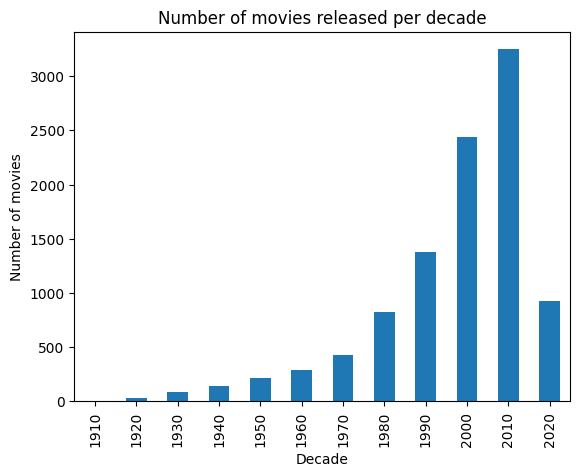

In [84]:
movies_per_decade = df.groupby((df['year_released'] // 10) * 10)

movies_per_decade.size().plot(
    kind='bar',
    title="Number of movies released per decade",
    xlabel="Decade",
    ylabel="Number of movies"
)


Evekre lebontva latszodik hogy az elso nagyobb lok min 2020ban majd egy meg nagyobb kovette a kovetkezo evekben

2020 utan a filmek visszaesese -> COvid

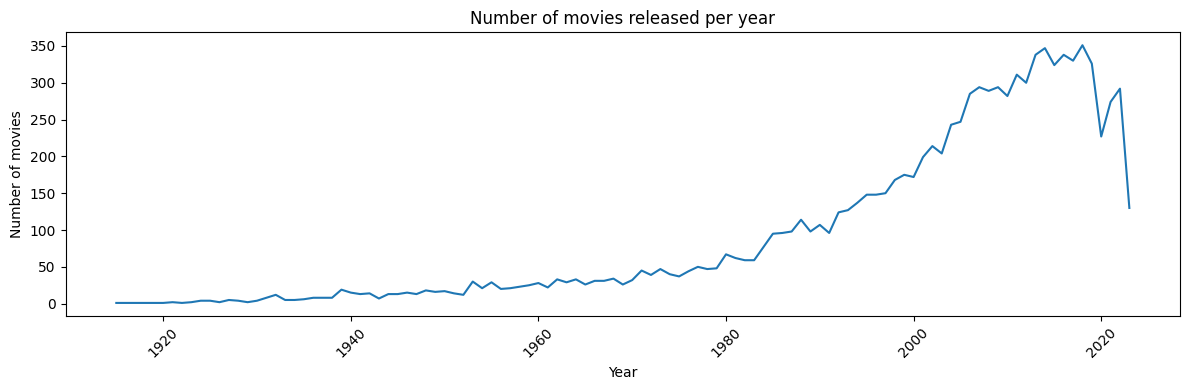

In [85]:
movies_per_year = df.groupby('year_released').size()

movies_per_year.plot(
    kind='line', figsize=(12, 4),
    title="Number of movies released per year",
    xlabel="Year", ylabel="Number of movies"
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 3.1.2 Filmek beveteleinek valtozasa

Egy lin reg egyenest osszevetni az USD valtozasaval

In [86]:
fig = px.box(df['gross'])
fig.show()

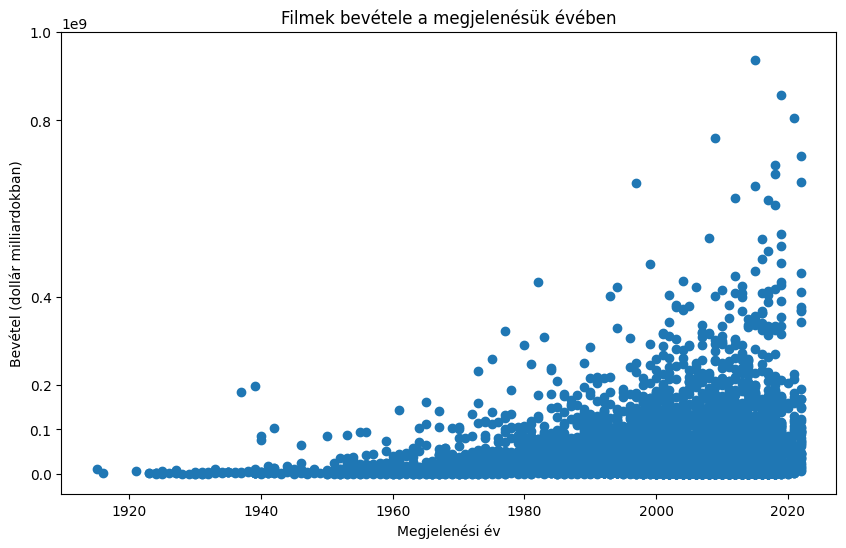

In [87]:


plt.figure(figsize=(10, 6))

plt.scatter(df["year_released"], df["gross"])
plt.xlabel("Megjelenési év")
plt.ylabel("Bevétel (dollár milliardokban)")
plt.title("Filmek bevétele a megjelenésük évében")
plt.yticks([0, 100_000_000, 200_000_000, 400_000_000, 800_000_000, 1_000_000_000])

plt.show()


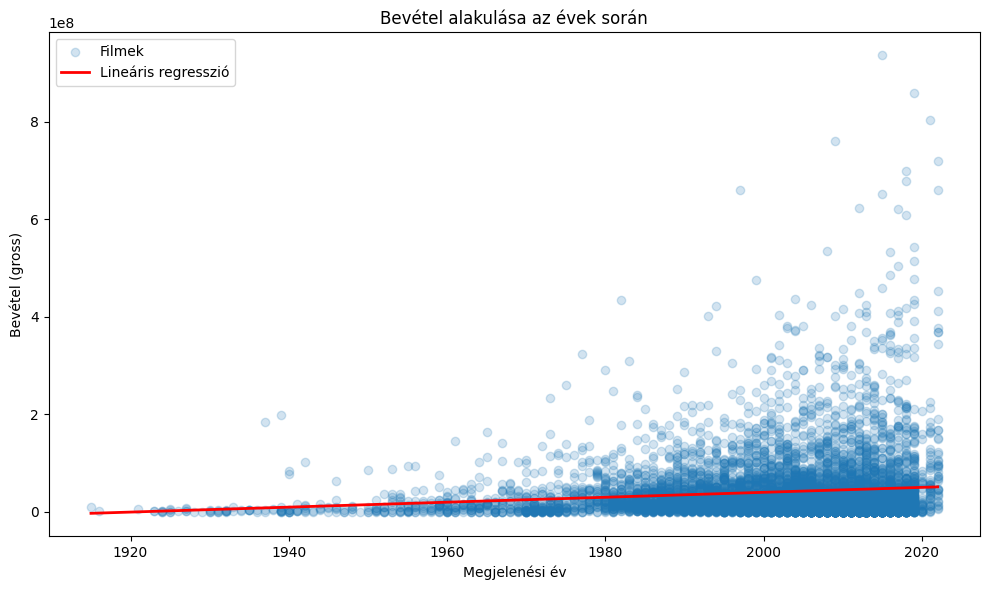

In [88]:
# Adatok (hiányzók kiszűrése)
x = df["year_released"]
y = df["gross"]
mask = x.notna() & y.notna()
x = x[mask].astype(float)
y = y[mask].astype(float)

# Lineáris regresszió: y = a*x + b
a, b = np.polyfit(x, y, 1)

# Egyenes kirajzolásához x-tartomány
x_line = np.linspace(x.min(), x.max(), 100)
y_line = a * x_line + b

plt.figure(figsize=(10, 6))

# Szórásdiagram
plt.scatter(x, y, alpha=0.2, label="Filmek")

# Regressziós egyenes
plt.plot(x_line, y_line, linewidth=2, label="Lineáris regresszió",color='red')

plt.xlabel("Megjelenési év")
plt.ylabel("Bevétel (gross)")
plt.title("Bevétel alakulása az évek során")
plt.legend()
plt.tight_layout()
plt.show()

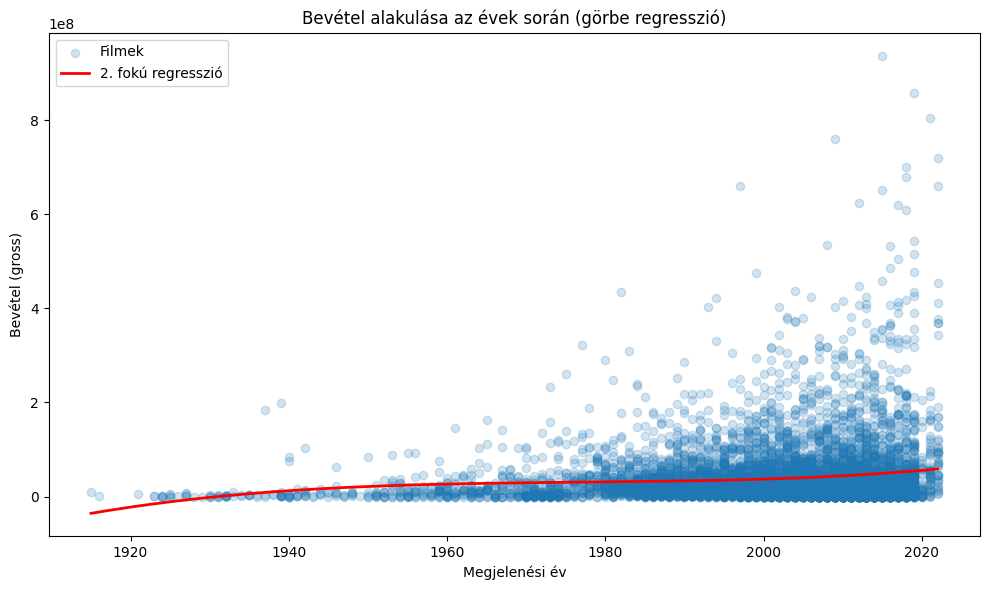

In [89]:


x = df["year_released"]
y = df["gross"]
mask = x.notna() & y.notna()
x = x[mask].astype(float)
y = y[mask].astype(float)

# 2. fokú polinom illesztése (görbe)
coeffs = np.polyfit(x, y, 3)      # <-- itt 2 a fokszám
x_line = np.linspace(x.min(), x.max(), 200)
y_line = np.polyval(coeffs, x_line)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.2, label="Filmek")

# görbe rajzolása
plt.plot(x_line, y_line, color="red", linewidth=2, label="2. fokú regresszió")

plt.xlabel("Megjelenési év")
plt.ylabel("Bevétel (gross)")
plt.title("Bevétel alakulása az évek során (görbe regresszió)")
plt.legend()
plt.tight_layout()
plt.show()


<Axes: title={'center': 'Éves átlagos bevétel alakulása az évek során'}, xlabel='Megjelenési év', ylabel='Átlagos bevétel (gross)'>

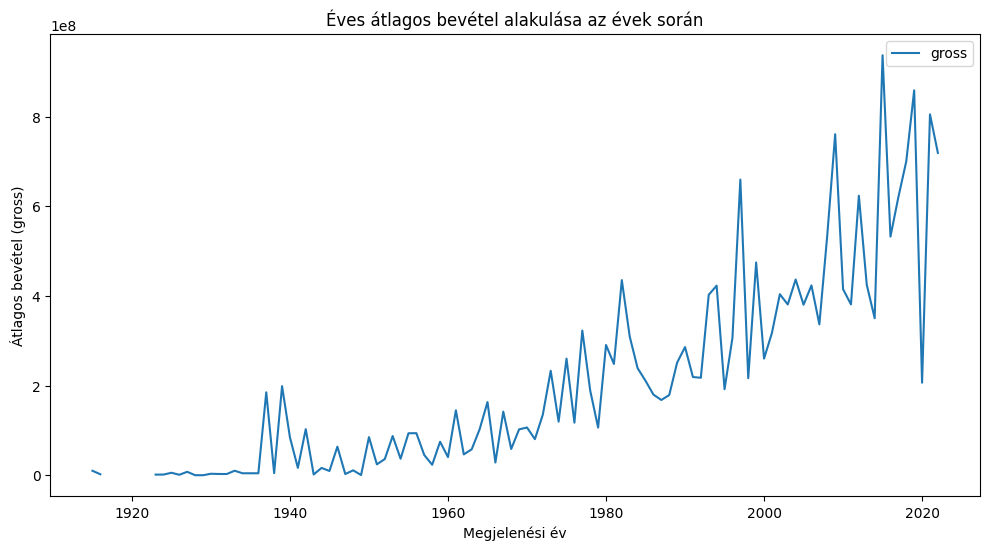

In [90]:
df.groupby("year_released")["gross"].max().reset_index().plot(
    x="year_released", y="gross", kind="line", figsize=(12, 6),
    title="Éves átlagos bevétel alakulása az évek során",
    xlabel="Megjelenési év",
    ylabel="Átlagos bevétel (gross)"
)

In [91]:
# 1) Éves max bevétel
yearly_gross = df.groupby("year_released")["gross"].max().reset_index()
yearly_gross.rename(columns={"gross": "max_gross"}, inplace=True)

# 2) Éves átlagos szavazatszám
yearly_votes = df.groupby("year_released")["votes"].mean().reset_index()
yearly_votes.rename(columns={"votes": "avg_votes"}, inplace=True)

# 3) Összekapcsolás év alapján
merged = yearly_gross.merge(yearly_votes, on="year_released", how="inner")

# 4) Korreláció számítása
corr = merged["max_gross"].corr(merged["avg_votes"])
corr


np.float64(0.660269094735791)

Minden evben a legdragabb film diagramja

### 3.1.3 Ertekelesek

Egesz jol korrelal, jo lehet hianyzo ertekeke becslesenek

In [92]:
df[["movie_rating", "metascore"]].corr()


,movie_rating,metascore
movie_rating,1.00,0.72
metascore,0.72,1.00


In [93]:
fig = px.box(df['movie_rating'])
fig.show()

## 3.2 Kategorikus változók vizsgálata

### 3.3.1 Mufajok darabszam

egy filmnek tobb mufaj!
nepszerusegre lehet kovetkeztetni

In [94]:
df.select_dtypes(include="object").nunique()

movie_title      9632
genre             425
certification      24
director         4162
actors           9947
description      9996
dtype: int64

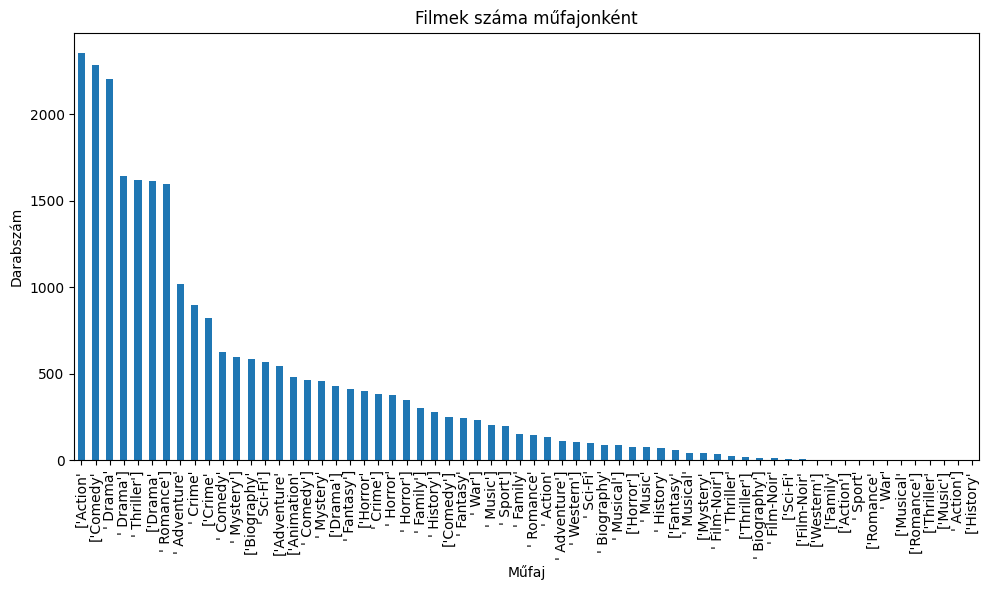

In [95]:
genre_counts = df["genre"].str.split(", ").explode().value_counts()

plt.figure(figsize=(10, 6))
genre_counts.plot(kind="bar")
plt.xlabel("Műfaj")
plt.ylabel("Darabszám")
plt.title("Filmek száma műfajonként")
plt.tight_layout()
plt.show()

## 3.4 Nepszeruseg

### 3.4.1 Legnepszerubb mufajok

In [96]:
df['avg_score'] = df[['metascore', 'movie_rating']].mean(axis=1)

tablazat mufajonkent az osszesitett / atlag bevetel, nepszeruseg, ertekeles
hasonloan ugyanez rendezokkel es besorolassal

# 4 Összefüggések feltárása
Korrelációk, releváns kapcsolatok, érdekes megfigyelések kiemelése

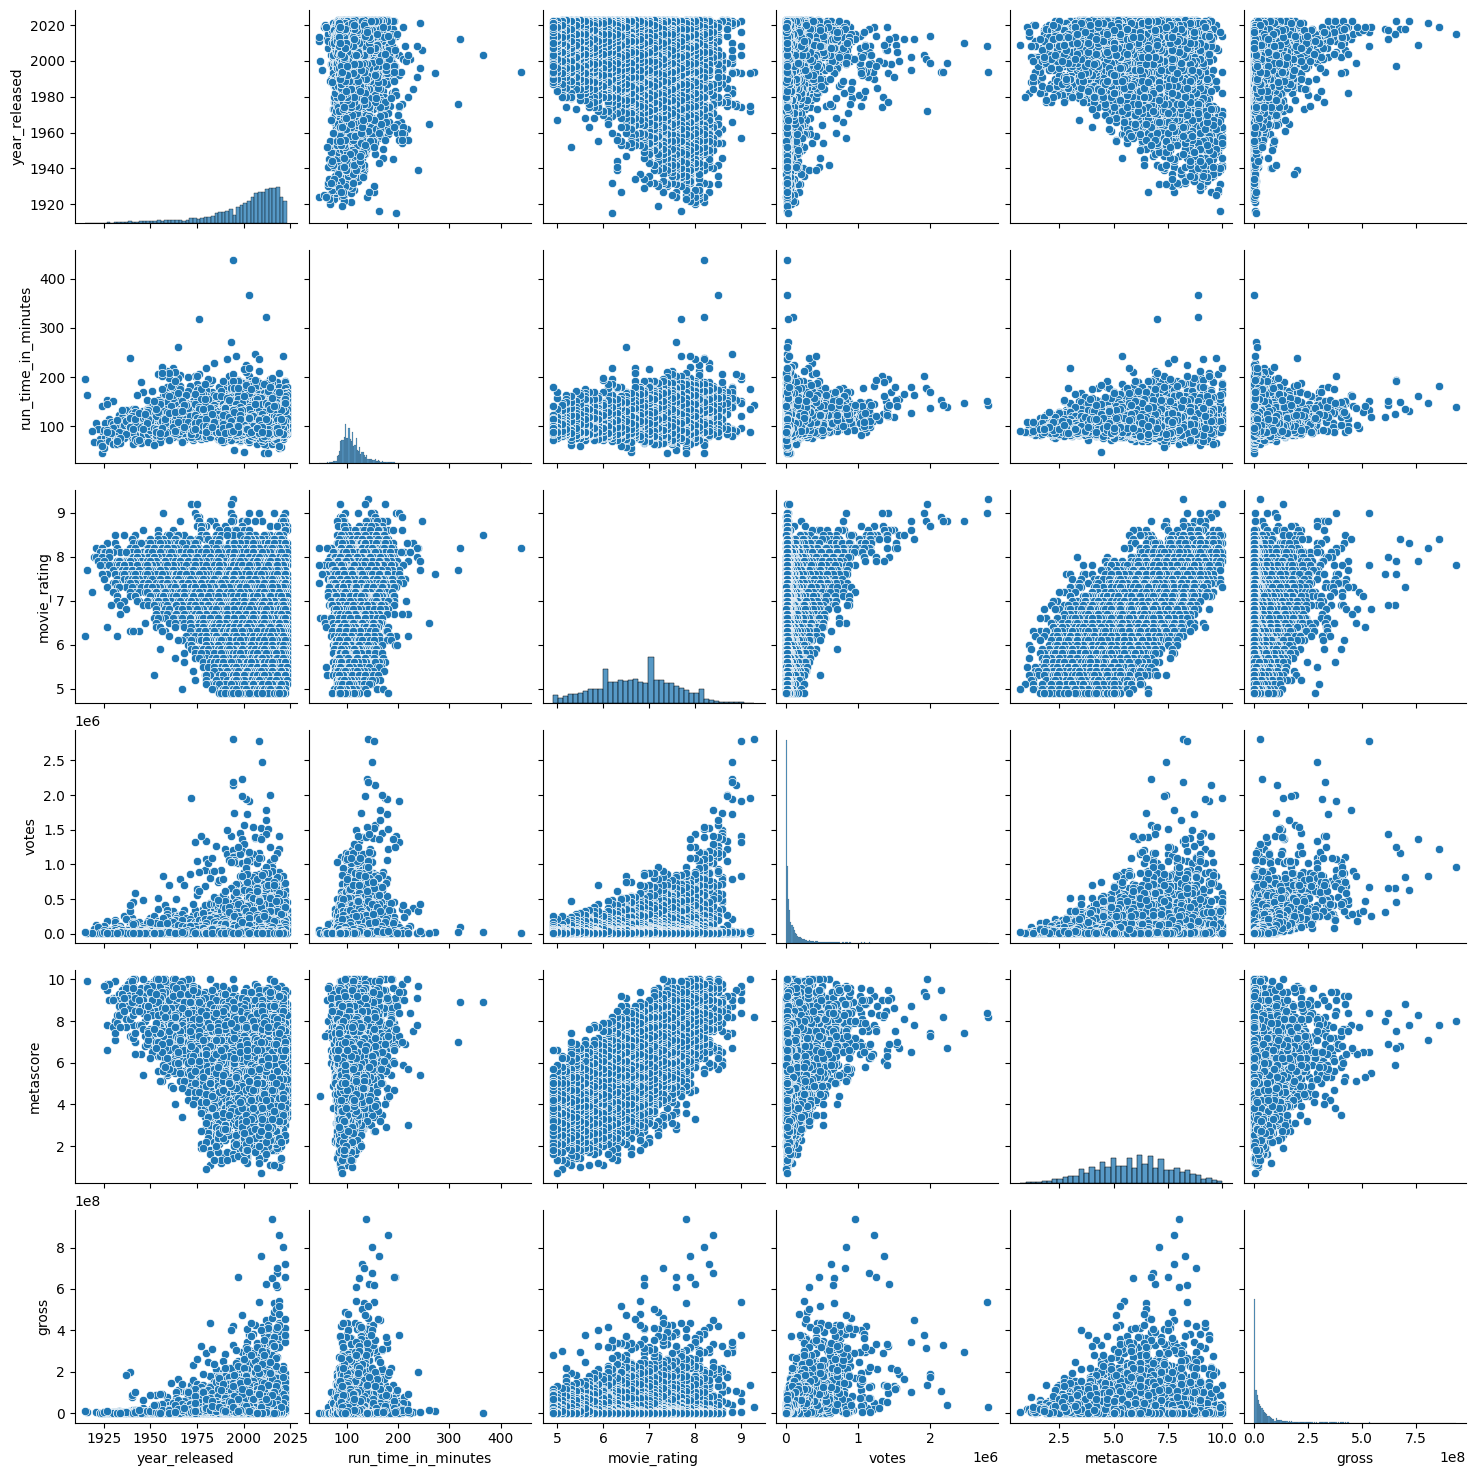

In [97]:
pp = sns.pairplot(df, vars=['year_released', 
                       'run_time_in_minutes', 
                       'movie_rating',
                       'votes', 
                       'metascore', 
                       'gross'])

In [98]:
corr = df[['year_released', 
           'run_time_in_minutes', 
           'movie_rating',
           'votes', 
           'metascore', 
           'gross']].dropna().corr()
corr

,year_released,run_time_in_minutes,movie_rating,votes,metascore,gross
year_released,1.00,-0.05,-0.24,0.08,-0.21,0.11
run_time_in_minutes,-0.05,1.00,0.37,0.29,0.23,0.21
movie_rating,-0.24,0.37,1.00,0.42,0.72,0.12
votes,0.08,0.29,0.42,1.00,0.23,0.61
metascore,-0.21,0.23,0.72,0.23,1.00,0.04
gross,0.11,0.21,0.12,0.61,0.04,1.00


<Axes: >

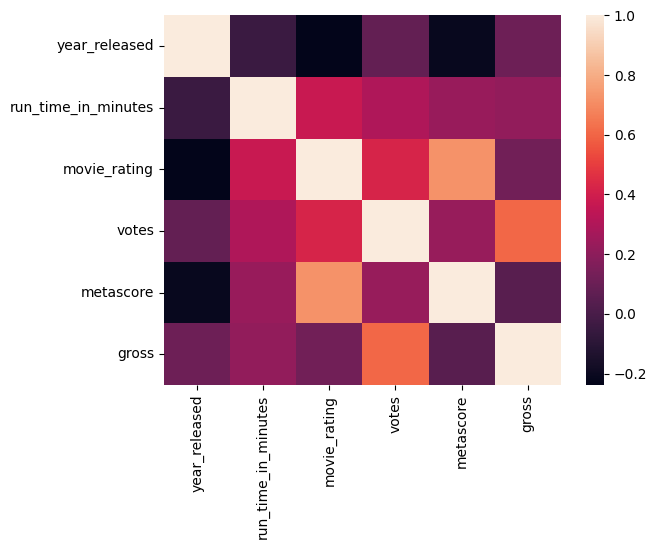

In [99]:
sns.heatmap(corr)

# 5 Kezdeti hipotézisek megfogalmazása

# 6 Egyeb

In [ ]:
# hianyzo adatok kezelese medianal csoportositva
df["metascore"] = df.groupby(pd.cut(df["movie_rating"], bins=[0,5,7,10]))["metascore"] \
                    .transform(lambda s: s.fillna(s.median()))
